In [161]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [162]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [163]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [164]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [165]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data.iloc[:, 1:])

In [166]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns[1:])

# Copy the crypto names from the original DataFrame
scaled_df["coin_id"] = df_market_data.iloc[:, 0]

# Set the coin_id column as index
scaled_df.set_index("coin_id", inplace=True)

# Display the scaled DataFrame
print(scaled_df.head())

         price_change_percentage_7d  price_change_percentage_14d  \
coin_id                                                            
NaN                        0.493193                     0.772200   
NaN                        0.934445                     0.558692   
NaN                       -0.706337                    -0.021680   
NaN                       -0.810928                     0.249458   
NaN                        2.000959                     1.760610   

         price_change_percentage_30d  price_change_percentage_60d  \
coin_id                                                             
NaN                         0.235460                    -0.067495   
NaN                        -0.054341                    -0.273483   
NaN                        -0.061030                     0.008005   
NaN                        -0.050388                    -0.373164   
NaN                         0.545842                    -0.291203   

         price_change_percentage_200d  

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [167]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [168]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

In [169]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

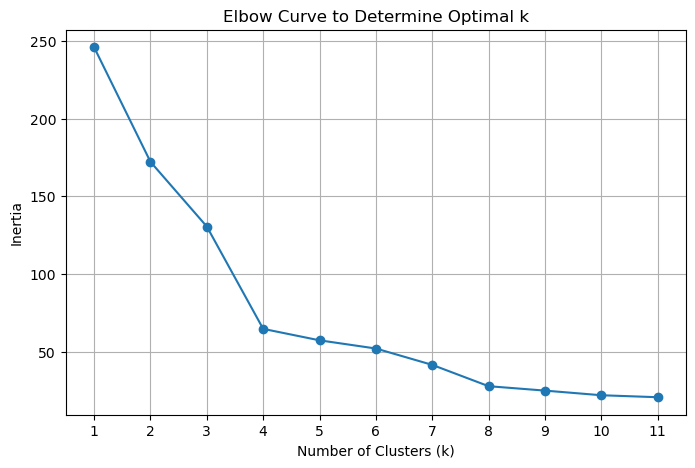

In [170]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o")
plt.title("Elbow Curve to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [171]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)

In [172]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [173]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans_model.predict(scaled_df)

# Print the resulting array of cluster values.
print("Cluster Values:", clusters)

Cluster Values: [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [174]:
# Create a copy of the scaled DataFrame
scaled_df_with_clusters = scaled_df.copy()

In [175]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_df_with_clusters["Cluster"] = clusters

# Display the copy of the scaled DataFrame
scaled_df_with_clusters.head()

,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,
NaN,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
NaN,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
NaN,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
NaN,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
NaN,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


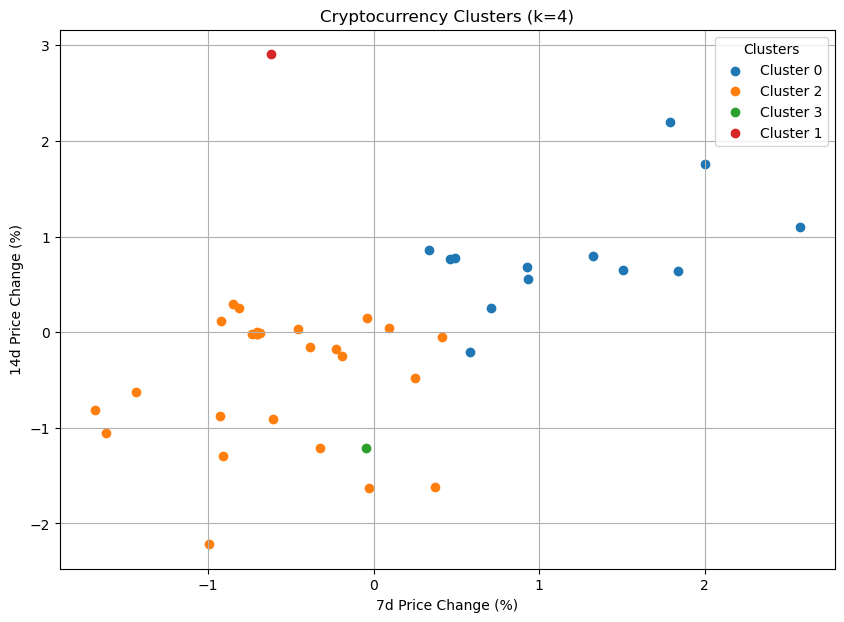

In [176]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
# Scatter plot using Matplotlib
plt.figure(figsize=(10, 7))

for cluster in scaled_df_with_clusters["Cluster"].unique():
    cluster_data = scaled_df_with_clusters[scaled_df_with_clusters["Cluster"] == cluster]
    plt.scatter(
        cluster_data["price_change_percentage_7d"],
        cluster_data["price_change_percentage_14d"],
        label=f"Cluster {cluster}"
    )

plt.title("Cryptocurrency Clusters (k=4)")
plt.xlabel("7d Price Change (%)")
plt.ylabel("14d Price Change (%)")
plt.legend(title="Clusters")
plt.grid(True)
plt.show()


---

### Optimize Clusters with Principal Component Analysis.

In [177]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [178]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(scaled_df_with_clusters.drop(columns=["Cluster"]))
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"], index=scaled_df_with_clusters.index)

# View the scaled PCA data
print(pca_df.head())

              PC1       PC2       PC3
coin_id                              
NaN      0.140806 -0.968578  0.287532
NaN     -0.035885 -0.805101  0.805260
NaN     -0.428877 -0.085640 -0.745510
NaN     -0.501785 -0.151170 -0.622544
NaN      0.553806 -2.255201  1.542815


In [179]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Total Explained Variance:", explained_variance.sum())


Explained Variance Ratio: [0.41860626 0.31447904 0.19074744]
Total Explained Variance: 0.9238327372153452


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 92.38%.

This means that 92.38% of the information from the original dataset is retained within the first three principal components, which is a strong representation of the original data.

In [180]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original scaled DataFrame
pca_df["coin_id"] = scaled_df_with_clusters.index

# Set the coin_id column as index
pca_df.set_index("coin_id", inplace=True)

# Display the scaled PCA DataFrame
print(pca_df.head())

              PC1       PC2       PC3
coin_id                              
NaN      0.140806 -0.968578  0.287532
NaN     -0.035885 -0.805101  0.805260
NaN     -0.428877 -0.085640 -0.745510
NaN     -0.501785 -0.151170 -0.622544
NaN      0.553806 -2.255201  1.542815


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [181]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [182]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(pca_df)
    inertia_values_pca.append(kmeans_pca.inertia_)

In [183]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values, "inertia": inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)
print(elbow_df_pca)

     k     inertia
0    1  227.262853
1    2  153.769788
2    3  112.113122
3    4   47.034563
4    5   36.413356
5    6   30.050115
6    7   24.928238
7    8   17.841772
8    9   13.805194
9   10   12.041813
10  11   10.703800


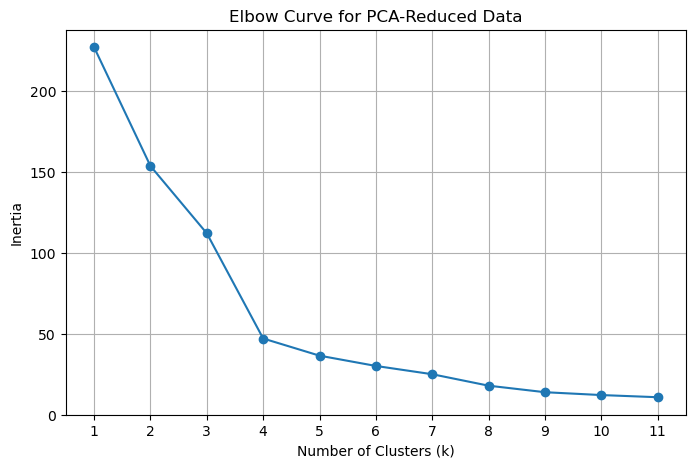

In [184]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_data_pca["k"], elbow_data_pca["inertia"], marker="o")
plt.title("Elbow Curve for PCA-Reduced Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 𝑘 when using the PCA data appears to be 4, as the inertia curve shows a significant drop until k=4, after which it levels off.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** o, it does not differ. The best k value for both the original data and the PCA-reduced data is 4. This consistency suggests that reducing the dataset to three principal components retained the key clustering information.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [185]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=42)

In [186]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

KMeans(n_clusters=4, random_state=42)

In [187]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_clusters = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values.
print("PCA Cluster Values:", pca_clusters)

PCA Cluster Values: [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [188]:
# Create a copy of the scaled PCA DataFrame
pca_df_with_clusters = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_df_with_clusters["Cluster"] = pca_clusters

# Display the copy of the scaled PCA DataFrame
print(pca_df_with_clusters.head())

              PC1       PC2       PC3  Cluster
coin_id                                       
NaN      0.140806 -0.968578  0.287532        0
NaN     -0.035885 -0.805101  0.805260        0
NaN     -0.428877 -0.085640 -0.745510        2
NaN     -0.501785 -0.151170 -0.622544        2
NaN      0.553806 -2.255201  1.542815        0


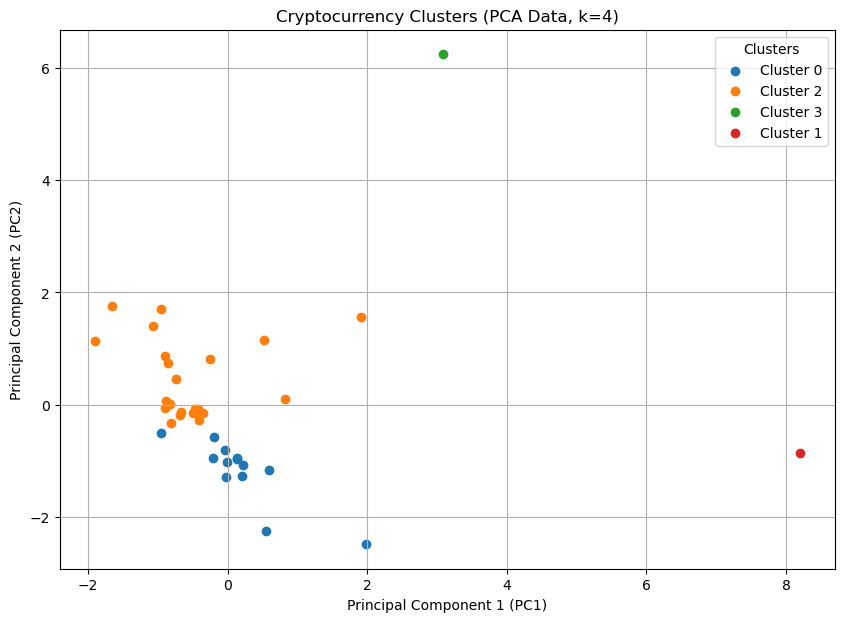

In [189]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
plt.figure(figsize=(10, 7))

for cluster in pca_df_with_clusters["Cluster"].unique():
    cluster_data = pca_df_with_clusters[pca_df_with_clusters["Cluster"] == cluster]
    plt.scatter(
        cluster_data["PC1"],
        cluster_data["PC2"],
        label=f"Cluster {cluster}"
    )

plt.title("Cryptocurrency Clusters (PCA Data, k=4)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

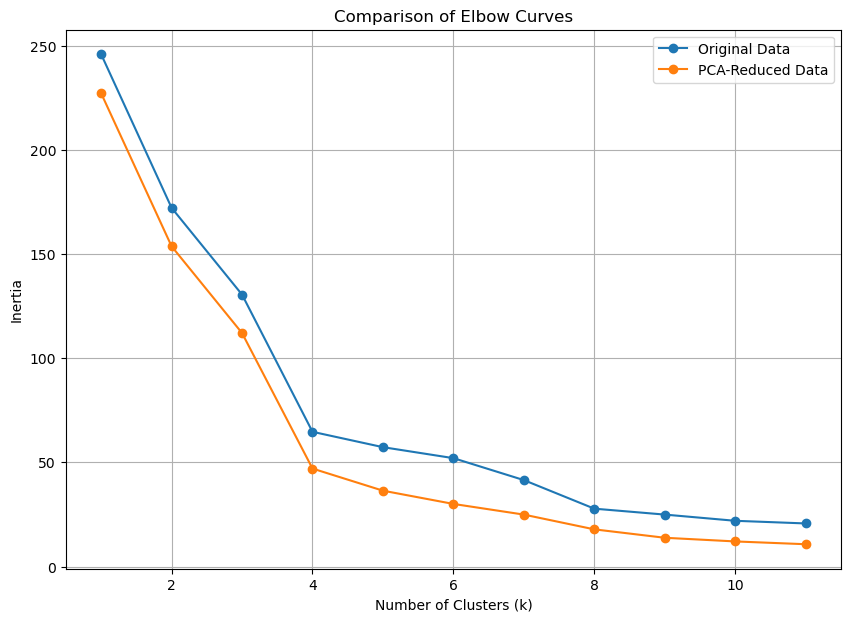

In [190]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(10, 7))

plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o", label="Original Data")

plt.plot(elbow_df_pca["k"], elbow_df_pca["inertia"], marker="o", label="PCA-Reduced Data")

plt.title("Comparison of Elbow Curves")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.legend()
plt.grid(True)
plt.show()

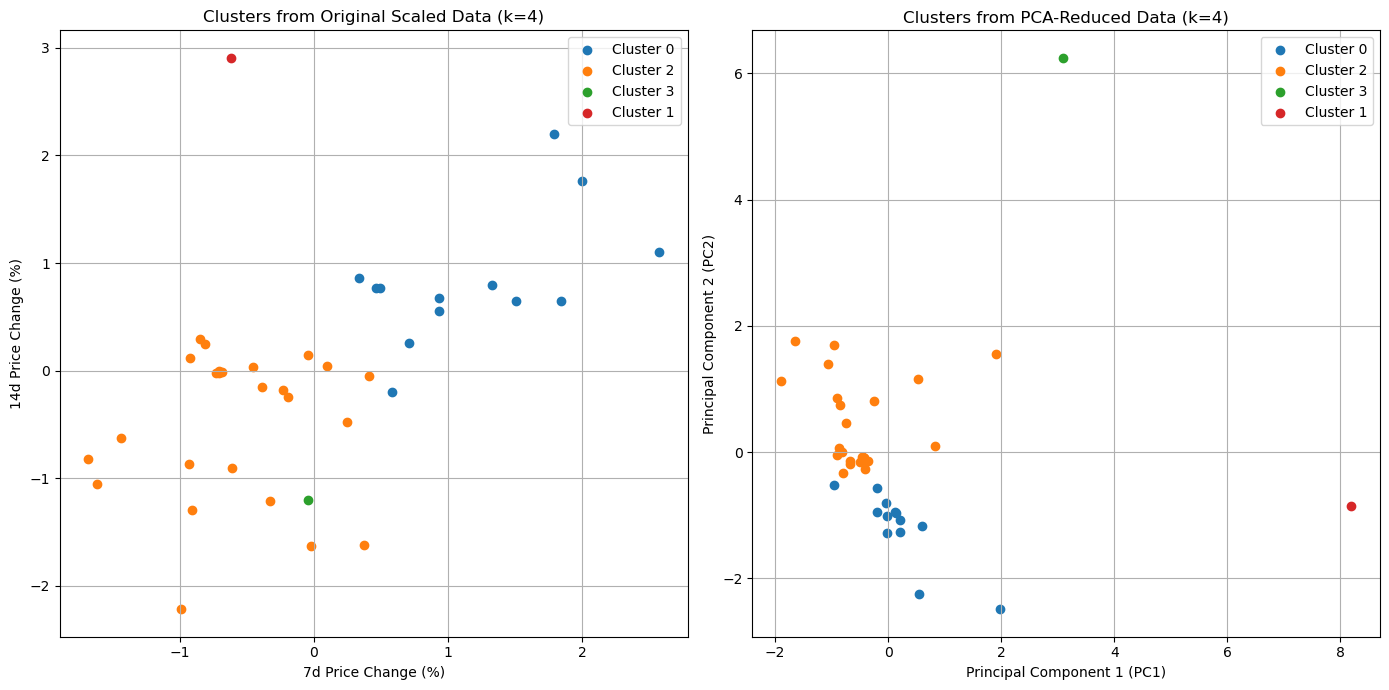

In [191]:
# Composite plot to contrast the clusters
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
for cluster in scaled_df_with_clusters["Cluster"].unique():
    cluster_data = scaled_df_with_clusters[scaled_df_with_clusters["Cluster"] == cluster]
    plt.scatter(
        cluster_data["price_change_percentage_7d"],
        cluster_data["price_change_percentage_14d"],
        label=f"Cluster {cluster}"
    )
plt.title("Clusters from Original Scaled Data (k=4)")
plt.xlabel("7d Price Change (%)")
plt.ylabel("14d Price Change (%)")
plt.legend()
plt.grid(True)

# Scatter plot for the PCA-reduced data clusters
plt.subplot(1, 2, 2)
for cluster in pca_df_with_clusters["Cluster"].unique():
    cluster_data = pca_df_with_clusters[pca_df_with_clusters["Cluster"] == cluster]
    plt.scatter(
        cluster_data["PC1"],
        cluster_data["PC2"],
        label=f"Cluster {cluster}"
    )
plt.title("Clusters from PCA-Reduced Data (k=4)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features through PCA simplifies the clustering process, retains most of the data's variance, and produces similar clusters to the original data while improving computational efficiency and visualization.